## FashionMNIST: Logistic regression을 이용한 classification
##### 0. 티셔츠/상의
##### 1. 바지
##### 2. 스웨터
##### 3. 드레스
##### 4. 코트
##### 5. 샌들
##### 6. 셔츠
##### 7. 운동화
##### 8. 가방
##### 9. 부츠 

### Fashion MNIST 학습 데이터 분석

In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms

fashion_train = FashionMNIST('./', train=True, download=True)
print('fashion_train type: ', type(fashion_train))
print('fhasion_train length: ', len(fashion_train))
print('')
print('fashion_train[0] type: ', type(fashion_train[0]))
print('fashion_train[0] length: ', len(fashion_train[0]))
print('')
print('fashion_train[0][0] type: ', type(fashion_train[0][0]))
print('fashion_train[0][0] info: ', fashion_train[0][0])
print('')
print('fashion_train[0][1] type: ', type(fashion_train[0][1]))
print('fashion_train[0][1] info: ', fashion_train[0][1])

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


fashion_train type:  torchvision.datasets.mnist.FashionMNIST
fhasion_train length:  60000

fashion_train[0] type:  <class 'tuple'>
fashion_train[0] length:  2

fashion_train[0][0] type:  <class 'PIL.Image.Image'>
fashion_train[0][0] info:  <PIL.Image.Image image mode=L size=28x28 at 0x7FCE143D8400>

fashion_train[0][1] type:  <class 'int'>
fashion_train[0][1] info:  9


### Fashion MNIST 테스트 데이터 분석

In [ ]:
fashion_test = FashionMNIST('./', train=False, download=True)
print('fashion_train type: ', type(fashion_train))
print('fhasion_train length: ', len(fashion_train))
print('')
print('fashion_train[0] type: ', type(fashion_train[0]))
print('fashion_train[0] length: ', len(fashion_train[0]))
print('')
print('fashion_train[0][0] type: ', type(fashion_train[0][0]))
print('fashion_train[0][0] info: ', fashion_train[0][0])
print('')
print('fashion_train[0][1] type: ', type(fashion_train[0][1]))
print('fashion_train[0][1] info: ', fashion_train[0][1])

fashion_train type:  torchvision.datasets.mnist.FashionMNIST
fhasion_train length:  60000

fashion_train[0] type:  <class 'tuple'>
fashion_train[0] length:  2

fashion_train[0][0] type:  <class 'PIL.Image.Image'>
fashion_train[0][0] info:  <PIL.Image.Image image mode=L size=28x28 at 0x7FCE143D8518>

fashion_train[0][1] type:  <class 'int'>
fashion_train[0][1] info:  9


### Dataset을 만든다. (비유: 약수물을 정수기 통에 담는다.)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch

x = torch.tensor(fashion_train.data, dtype=torch.float)   # 28 x 28 사진 60,000개 
y = torch.tensor(fashion_train.targets, dtype=torch.long)   #  0 ~ 9까지 60,000개

fashion_train_dataset = TensorDataset(x, y)   # 정수기 통에 물을 담음

fashion_test_dataset = TensorDataset(torch.tensor(fashion_test.data, dtype=torch.float),
                                     torch.tensor(fashion_test.targets, dtype=torch.long))

print(type(fashion_train_dataset))

# 수도꼭지 각각 연결
fashion_train_dataloader = DataLoader(fashion_train_dataset, batch_size=64, shuffle=True)   
fashion_test_dataloader = DataLoader(fashion_test_dataset, batch_size=20000, shuffle=True)    # 한번에 시험을 봄

for x1, y1 in fashion_train_dataloader:
  x1 = x1.view(-1, 784)   # 64장 * 28 *28 = 64 * 784 -> 즉, -1은 64가 되는 것
  print(x1.size(), x1.device, x1.dtype)
  break; 

torch.utils.data.dataset.TensorDataset

torch.Size([64, 784]) cpu torch.float32


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTen

### 학습을 위한 모델, Loss, Optimizer 설정
### 다층 nn.Linear를 이용한 모델

In [ ]:
import torch
from torch import nn, optim

net = nn.Sequential(
    nn.Linear(784, 392),
    nn.ReLU(),
    nn.Linear(392, 196),
    nn.ReLU(),
    nn.Linear(196, 98),
    nn.ReLU(),
    nn.Linear(98, 49),
    nn.ReLU(),
    nn.Linear(49, 24),
    nn.ReLU(),
    nn.Linear(24, 10),
)

### Loss 함수: Cross Entropy
### Optimizer: Adam

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

### 학습 시작

In [ ]:
losses = []

net.to('cuda')

for epoc in range(200):

  batch_loss = 0.0    # 64장 train을 할 때마다 나오는 loss값을 저장하기 위해
  net.train()
  for x_train, y_train in fashion_train_dataloader:

    x_train = x_train.to(torch.device('cuda'))
    y_train = y_train.to(torch.device('cuda'))

    optimizer.zero_grad()

    y_pred = net(x_train.view((-1, 784)))

    loss = loss_fn(y_pred, y_train)
    loss.backward()

    optimizer.step()
    batch_loss += loss.item()
  losses.append(batch_loss)
  print(epoc, 'Loss: ', batch_loss)

  net.eval()
  with torch.no_grad():

    for x_test, y_test in fashion_test_dataloader:
      x_test = x_test.to(torch.device('cuda'))
      y_test = y_test.to(torch.device('cuda'))

      test_result = net(x_test.view((-1, 784)))
      pred = torch.argmax(test_result, dim=1)

      num_correct = (pred == y_test).sum().item()
      print('Accuracy: ', num_correct * 100.0 / len(y_test), '%')


0 Loss:  508.9277117103338
Accuracy:  83.97 %
1 Loss:  369.5227678120136
Accuracy:  85.43 %
2 Loss:  337.0984808206558
Accuracy:  85.24 %
3 Loss:  317.1175391301513
Accuracy:  86.47 %
4 Loss:  303.2354367226362
Accuracy:  85.53 %
5 Loss:  291.52827045321465
Accuracy:  87.75 %
6 Loss:  279.0402213409543
Accuracy:  87.21 %
7 Loss:  269.72459388524294
Accuracy:  88.17 %
8 Loss:  260.6959001868963
Accuracy:  87.11 %
9 Loss:  251.51360867917538
Accuracy:  87.06 %
10 Loss:  246.74727477505803
Accuracy:  87.82 %
11 Loss:  238.0953130722046
Accuracy:  87.32 %
12 Loss:  237.14660513401031
Accuracy:  87.82 %
13 Loss:  229.26464318484068
Accuracy:  88.17 %
14 Loss:  223.87179868668318
Accuracy:  87.87 %
15 Loss:  220.1617416702211
Accuracy:  88.57 %
16 Loss:  217.2047575749457
Accuracy:  88.84 %
17 Loss:  211.61415269970894
Accuracy:  87.07 %
18 Loss:  211.40752936527133
Accuracy:  88.28 %
19 Loss:  204.9086866080761
Accuracy:  88.17 %
20 Loss:  193.85686874389648
Accuracy:  88.54 %
21 Loss:  198

### 학습과정 중의 loss visualization

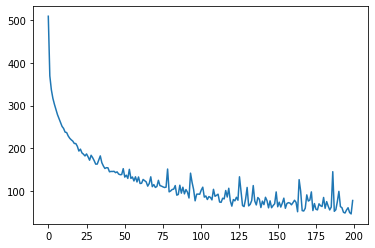

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)